In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

input_dir = r"C:\JK\SCHOOL\4.2\MACHINE LEARNING\archive (3)"
print(check_output(["dir", input_dir], shell=True).decode("utf8"))


# Any results you write to the current directory are saved as output.

 Volume in drive C is Local Disk
 Volume Serial Number is B070-0DB0

 Directory of C:\JK\SCHOOL\4.2\MACHINE LEARNING\archive (3)

13/02/2025  13:31    <DIR>          .
13/02/2025  13:31    <DIR>          ..
19/09/2019  23:04            41,983 student-mat.csv
19/09/2019  23:04               269 student-merge.R
19/09/2019  23:04            68,558 student-por.csv
               3 File(s)        110,810 bytes
               2 Dir(s)  182,467,231,744 bytes free



In [28]:
data = pd.read_csv(r"C:\JK\SCHOOL\4.2\MACHINE LEARNING\archive (3)\student-mat.csv")

In [29]:
# I use final grade = G3, and weekly alcohol consumption = Dalc + Walc 
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

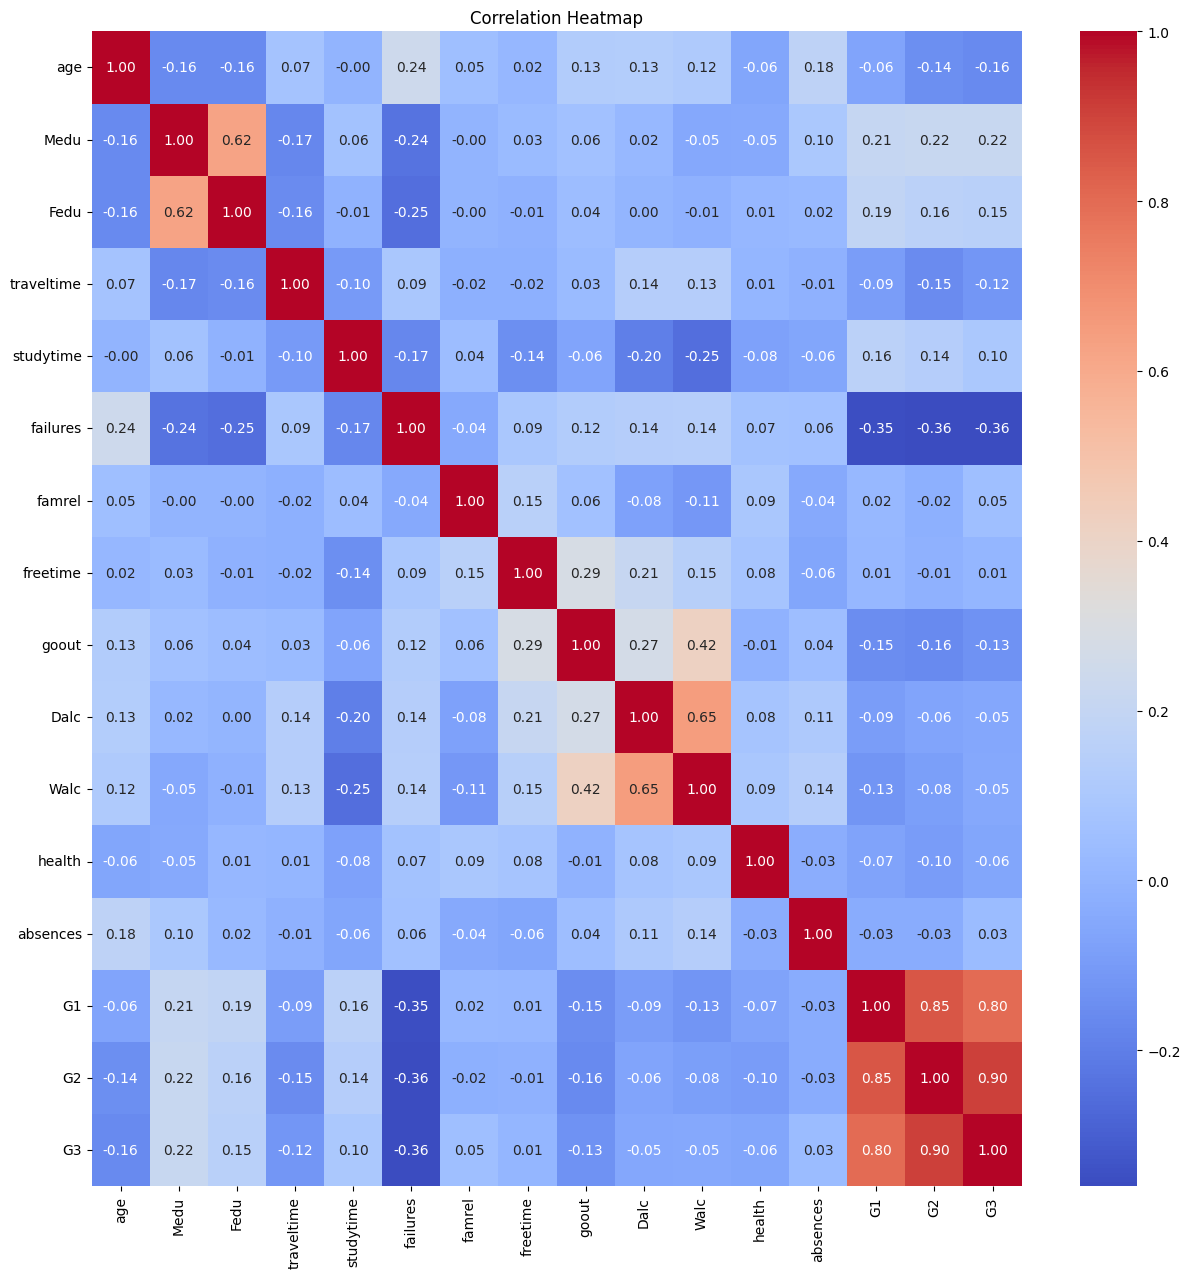

In [33]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cbar=True, cmap="coolwarm")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
data['Dalc'] = data['Dalc'] + data['Walc']

Text(0.5, 0, 'Weekly alcohol consumption')

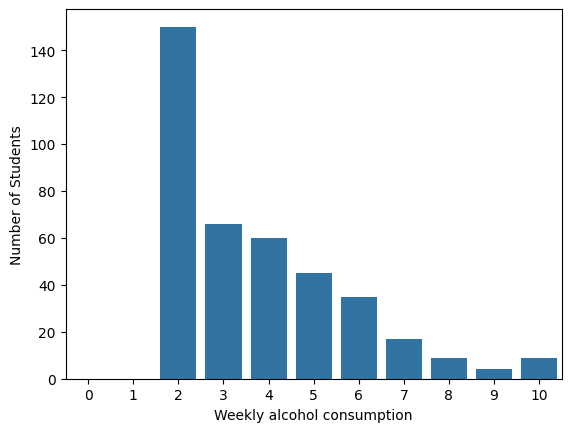

In [35]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

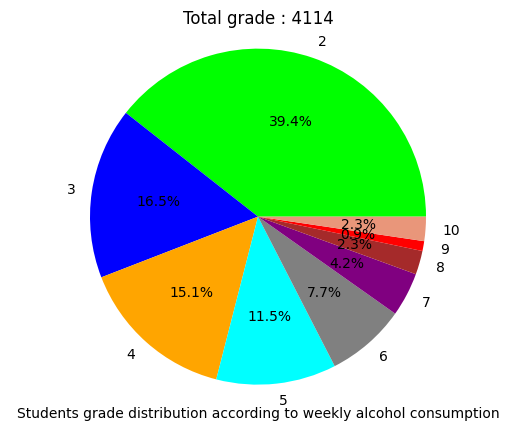

In [36]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

c:\Users\JEWEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JEWEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JEWEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JEWEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg,

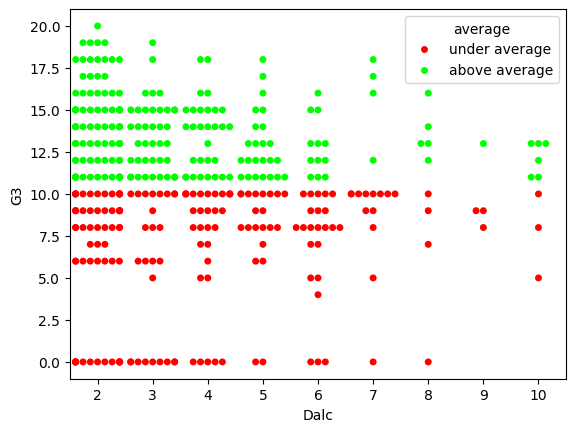

In [37]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

In [38]:
sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

Text(0.5, 0, 'Weekly alcohol consumption')

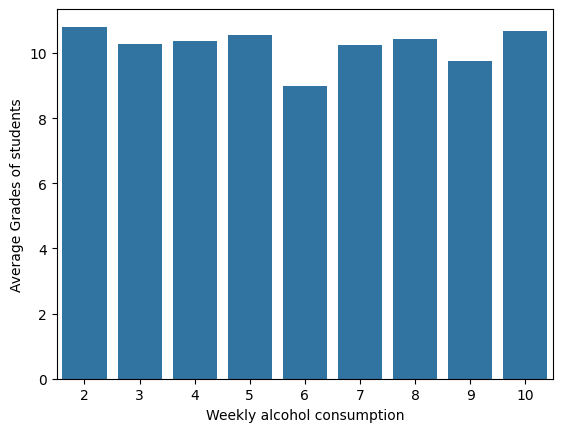

In [39]:
# Average grade
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')